แบบฝึกหัดนี้ใช้ชุดข้อมูล Immunotherapy.csv ซึ่งเป็นข้อมูลผลของการรักษาโรคหูดชนิดหนึ่งโดยใช้วิธีภูมิคุ้มกันบำบัด รายละเอียดของชุดข้อมูลแสดงในภาพด้านล่าง

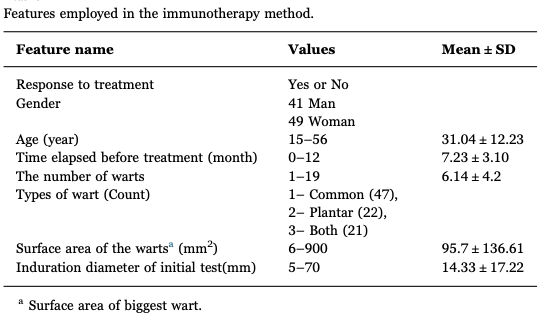

![warts](https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/warts.png)

In [1]:
#!pip install scikit-posthocs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scikit_posthocs as sp

In [3]:
df_impt = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/Immunotherapy.csv")
df_impt.head()

,gender,age,time,number_of_warts,type,area,induration_diameter,response
0,Female,15,1.75,1,Plantar,49,7,No
1,Female,38,2.50,1,Both,43,50,Yes
2,Female,24,4.25,1,common,174,30,Yes
3,Female,34,8.50,1,Plantar,163,7,No
4,Female,53,10.00,1,Plantar,30,25,Yes


In [4]:
df_impt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     object 
 1   age                  90 non-null     int64  
 2   time                 90 non-null     float64
 3   number_of_warts      90 non-null     int64  
 4   type                 90 non-null     object 
 5   area                 90 non-null     int64  
 6   induration_diameter  90 non-null     int64  
 7   response             90 non-null     object 
dtypes: float64(1), int64(4), object(3)
memory usage: 5.8+ KB


\
ให้นิสิตตอบคำถามพร้อมทั้งแสดงโค้ดที่ใช้ในการหาคำตอบ

1. แสดงวิธีการเพื่อให้ได้มาซึ่งกราฟด้านล่างนี้

![item1.svg](https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/item1.svg)

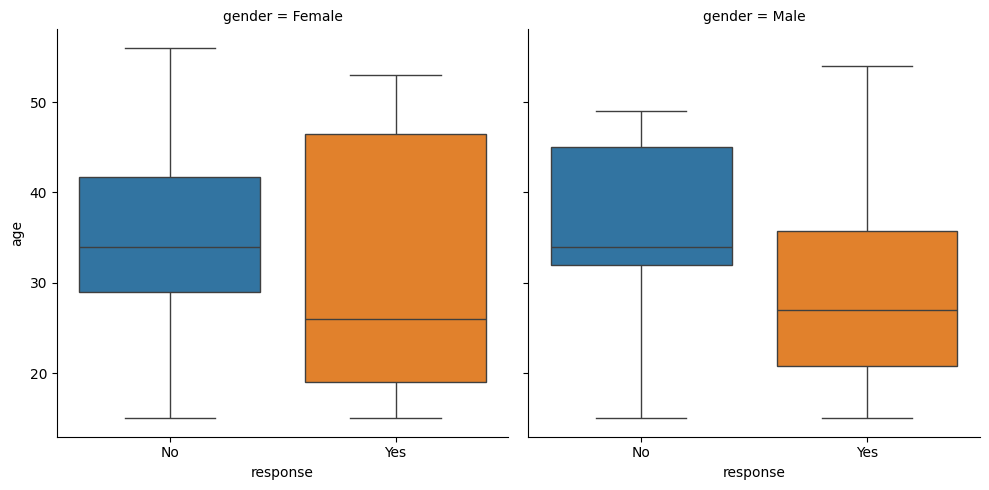

In [5]:
# สร้างกราฟ Boxplot แยกตามเพศ (gender)
sns.catplot(
    data=df_impt,
    x='response',      # แกน X เป็นผลตอบสนอง (No/Yes)
    y='age',           # แกน Y เป็นอายุ
    col='gender',      # แยกกราฟซ้าย-ขวา ตามเพศ (Female/Male)
    kind='box',         # กำหนดชนิดกราฟเป็น Boxplot
    hue='response',      # แยกสีตามผลตอบสนอง (No/Yes)
    palette={'No': 'tab:blue', 'Yes': 'tab:orange'}
)

plt.show()

####  
2. แสดงวิธีการเพื่อให้ได้มาซึ่งกราฟด้านล่างนี้

![item2.svg](https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/item2.svg)

<Axes: xlabel='gender', ylabel='age'>

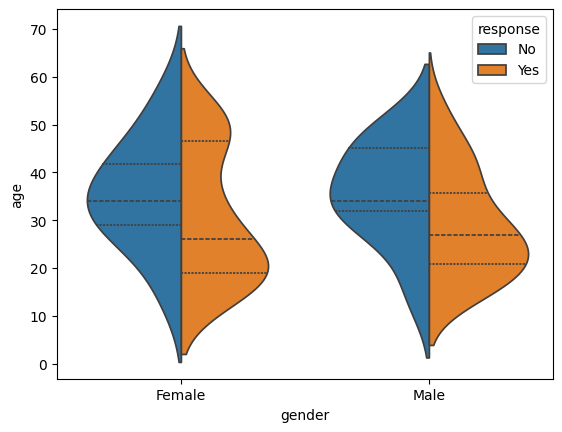

In [6]:
sns.violinplot(
    data=df_impt,
    x='gender',
    y='age',
    hue='response',
    split=True,       # ผ่าครึ่งกราฟเพื่อเปรียบเทียบ Yes/No
    inner='quartile', # แสดงเส้นประ Quartile ด้านใน
    palette={'No': 'tab:blue', 'Yes': 'tab:orange'}
)

####  
3. จากกราฟในข้อ 2 จงตอบคำถามต่อไปนี้
- การแจกแจงของกลุ่มตัวอย่างทั้ง 4 กลุ่ม Female-No, Female-Yes, Male-No และ Male-Yes เป็นการแจงแจกแบบปกติหรือไม่ มีวิธีการทดสอบทางสถิติอย่างไร

In [16]:
#Your code
# ทดสอบ Normality ของแต่ละกลุ่ม (Female-No, Female-Yes, Male-No, Male-Yes)
groups = {
    'Female-No': df_impt[(df_impt['gender'] == 'Female') & (df_impt['response'] == 'No')]['age'],
    'Female-Yes': df_impt[(df_impt['gender'] == 'Female') & (df_impt['response'] == 'Yes')]['age'],
    'Male-No': df_impt[(df_impt['gender'] == 'Male') & (df_impt['response'] == 'No')]['age'],
    'Male-Yes': df_impt[(df_impt['gender'] == 'Male') & (df_impt['response'] == 'Yes')]['age']
}

print("=== Shapiro-Wilk Test for Normality ===")
print("H0: ข้อมูลมีการแจกแจงแบบปกติ")
print("H1: ข้อมูลไม่มีการแจกแจงแบบปกติ")
print("α = 0.05\n")

for name, data in groups.items():
    stat, p_value = stats.shapiro(data)
    result = "ปกติ (Accept H0)" if p_value >= 0.05 else "ไม่ปกติ (Reject H0)"
    print(f"{name}: statistic={stat:.4f}, p-value={p_value:.4f} -> {result}")

=== Shapiro-Wilk Test for Normality ===
H0: ข้อมูลมีการแจกแจงแบบปกติ
H1: ข้อมูลไม่มีการแจกแจงแบบปกติ
α = 0.05

Female-No: statistic=0.9870, p-value=0.9916 -> ปกติ (Accept H0)
Female-Yes: statistic=0.8681, p-value=0.0003 -> ไม่ปกติ (Reject H0)
Male-No: statistic=0.9468, p-value=0.6554 -> ปกติ (Accept H0)
Male-Yes: statistic=0.9319, p-value=0.0443 -> ไม่ปกติ (Reject H0)


####  
- ค่าเฉลี่ยของอายุในกลุ่มตัวอย่าง Male-No แตกต่างจากค่าเฉลี่ยในกลุ่มตัวอย่าง Male-Yes อย่างมีนัยสำคัญหรือไม่ มีวิธีการทดสอบอย่างไร และควรตั้งสมมุติฐานอย่างไร

In [17]:
#Your code
# เปรียบเทียบ Male-No vs Male-Yes
male_no = df_impt[(df_impt['gender'] == 'Male') & (df_impt['response'] == 'No')]['age']
male_yes = df_impt[(df_impt['gender'] == 'Male') & (df_impt['response'] == 'Yes')]['age']

print("=== เปรียบเทียบ Male-No vs Male-Yes ===")
print("H0: μ(Male-No) = μ(Male-Yes)")
print("H1: μ(Male-No) ≠ μ(Male-Yes)")
print("α = 0.05\n")

# ตรวจสอบ normality ก่อน
_, p_no = stats.shapiro(male_no)
_, p_yes = stats.shapiro(male_yes)

if p_no >= 0.05 and p_yes >= 0.05:
    # ทั้งสองกลุ่มปกติ -> ใช้ t-test
    stat, p_value = stats.ttest_ind(male_no, male_yes)
    print(f"ใช้ Independent t-test (ทั้งสองกลุ่มแจกแจงปกติ)")
else:
    # มีกลุ่มที่ไม่ปกติ -> ใช้ Mann-Whitney U test
    stat, p_value = stats.mannwhitneyu(male_no, male_yes, alternative='two-sided')
    print(f"ใช้ Mann-Whitney U test (มีกลุ่มที่ไม่แจกแจงปกติ)")

print(f"statistic={stat:.4f}, p-value={p_value:.4f}")
result = "แตกต่างอย่างมีนัยสำคัญ (Reject H0)" if p_value < 0.05 else "ไม่แตกต่างอย่างมีนัยสำคัญ (Accept H0)"
print(f"สรุป: {result}")

=== เปรียบเทียบ Male-No vs Male-Yes ===
H0: μ(Male-No) = μ(Male-Yes)
H1: μ(Male-No) ≠ μ(Male-Yes)
α = 0.05

ใช้ Mann-Whitney U test (มีกลุ่มที่ไม่แจกแจงปกติ)
statistic=194.5000, p-value=0.1148
สรุป: ไม่แตกต่างอย่างมีนัยสำคัญ (Accept H0)


####  
- ค่าเฉลี่ยของอายุในกลุ่มตัวอย่าง Female-No แตกต่างจากค่าเฉลี่ยในกลุ่มตัวอย่าง Male-No อย่างมีนัยสำคัญหรือไม่ มีวิธีการทดสอบอย่างไร และควรตั้งสมมุติฐานอย่างไร

In [18]:
#Your code
# เปรียบเทียบ Female-No vs Male-No
female_no = df_impt[(df_impt['gender'] == 'Female') & (df_impt['response'] == 'No')]['age']
male_no = df_impt[(df_impt['gender'] == 'Male') & (df_impt['response'] == 'No')]['age']

print("=== เปรียบเทียบ Female-No vs Male-No ===")
print("H0: μ(Female-No) = μ(Male-No)")
print("H1: μ(Female-No) ≠ μ(Male-No)")
print("α = 0.05\n")

# ตรวจสอบ normality
_, p_f = stats.shapiro(female_no)
_, p_m = stats.shapiro(male_no)

if p_f >= 0.05 and p_m >= 0.05:
    stat, p_value = stats.ttest_ind(female_no, male_no)
    print(f"ใช้ Independent t-test (ทั้งสองกลุ่มแจกแจงปกติ)")
else:
    stat, p_value = stats.mannwhitneyu(female_no, male_no, alternative='two-sided')
    print(f"ใช้ Mann-Whitney U test (มีกลุ่มที่ไม่แจกแจงปกติ)")

print(f"statistic={stat:.4f}, p-value={p_value:.4f}")
result = "แตกต่างอย่างมีนัยสำคัญ (Reject H0)" if p_value < 0.05 else "ไม่แตกต่างอย่างมีนัยสำคัญ (Accept H0)"
print(f"สรุป: {result}")

=== เปรียบเทียบ Female-No vs Male-No ===
H0: μ(Female-No) = μ(Male-No)
H1: μ(Female-No) ≠ μ(Male-No)
α = 0.05

ใช้ Independent t-test (ทั้งสองกลุ่มแจกแจงปกติ)
statistic=0.0109, p-value=0.9915
สรุป: ไม่แตกต่างอย่างมีนัยสำคัญ (Accept H0)


####  
- ค่าเฉลี่ยของอายุในกลุ่มตัวอย่าง Female-Yes แตกต่างจากค่าเฉลี่ยในกลุ่มตัวอย่าง Male-Yes อย่างมีนัยสำคัญหรือไม่ มีวิธีการทดสอบอย่างไร และควรตั้งสมมุติฐานอย่างไร

In [19]:
#Your code
# เปรียบเทียบ Female-Yes vs Male-Yes
female_yes = df_impt[(df_impt['gender'] == 'Female') & (df_impt['response'] == 'Yes')]['age']
male_yes = df_impt[(df_impt['gender'] == 'Male') & (df_impt['response'] == 'Yes')]['age']

print("=== เปรียบเทียบ Female-Yes vs Male-Yes ===")
print("H0: μ(Female-Yes) = μ(Male-Yes)")
print("H1: μ(Female-Yes) ≠ μ(Male-Yes)")
print("α = 0.05\n")

# ตรวจสอบ normality
_, p_f = stats.shapiro(female_yes)
_, p_m = stats.shapiro(male_yes)

if p_f >= 0.05 and p_m >= 0.05:
    stat, p_value = stats.ttest_ind(female_yes, male_yes)
    print(f"ใช้ Independent t-test (ทั้งสองกลุ่มแจกแจงปกติ)")
else:
    stat, p_value = stats.mannwhitneyu(female_yes, male_yes, alternative='two-sided')
    print(f"ใช้ Mann-Whitney U test (มีกลุ่มที่ไม่แจกแจงปกติ)")

print(f"statistic={stat:.4f}, p-value={p_value:.4f}")
result = "แตกต่างอย่างมีนัยสำคัญ (Reject H0)" if p_value < 0.05 else "ไม่แตกต่างอย่างมีนัยสำคัญ (Accept H0)"
print(f"สรุป: {result}")

=== เปรียบเทียบ Female-Yes vs Male-Yes ===
H0: μ(Female-Yes) = μ(Male-Yes)
H1: μ(Female-Yes) ≠ μ(Male-Yes)
α = 0.05

ใช้ Mann-Whitney U test (มีกลุ่มที่ไม่แจกแจงปกติ)
statistic=639.0000, p-value=0.8668
สรุป: ไม่แตกต่างอย่างมีนัยสำคัญ (Accept H0)


####  
3. แสดงวิธีการเพื่อให้ได้มาซึ่งกราฟด้านล่างนี้

3.1

![item3.1.svg](https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/item3.1.svg)

C:\Users\Asus\AppData\Local\Temp\ipykernel_29116\1252999594.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


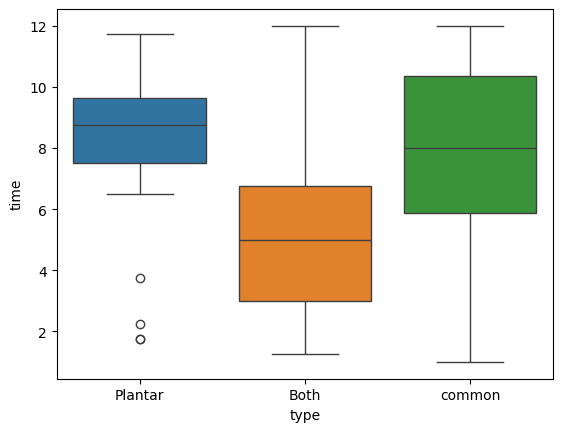

In [21]:
#Your code
sns.boxplot(
    data=df_impt,
    x='type',
    y='time',
    order=['Plantar', 'Both', 'common'],  # เรียงลำดับตามกราฟต้นฉบับ
    palette=['tab:blue', 'tab:orange', 'tab:green']
)
plt.xlabel('type')
plt.ylabel('time')
plt.show()

\
3.2

![item3.2.svg](https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/item3.2.svg)

C:\Users\Asus\AppData\Local\Temp\ipykernel_29116\2464990341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


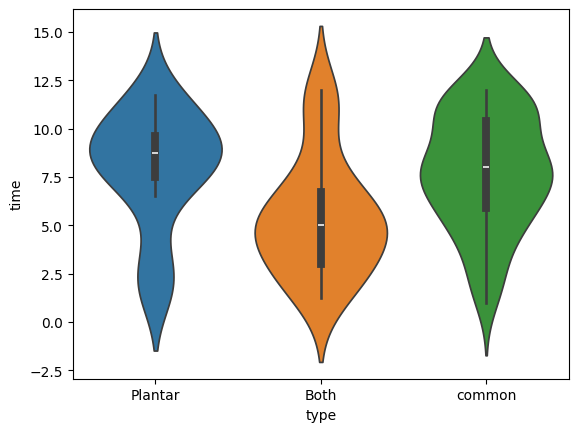

In [23]:
#Your code
sns.violinplot(
    data=df_impt,
    x='type',
    y='time',
    order=['Plantar', 'Both', 'common'],
    palette=['tab:blue', 'tab:orange', 'tab:green']
)
plt.xlabel('type')
plt.ylabel('time')
plt.show()

\
3.3

![item3.3.svg](https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/item3.3.svg)

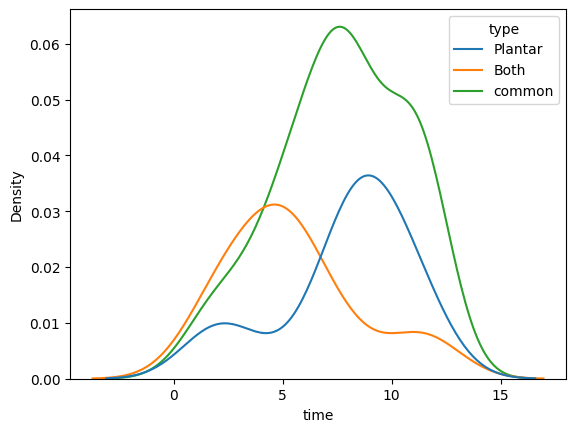

In [24]:
#Your code
sns.kdeplot(
    data=df_impt,
    x='time',
    hue='type',
    hue_order=['Plantar', 'Both', 'common'],
    palette=['tab:blue', 'tab:orange', 'tab:green']
)
plt.xlabel('time')
plt.ylabel('Density')
plt.show()

\
4. จากกราฟข้อ 3.1, 3.2, 3.3 การแจกแจงของค่า time ในกลุ่มตัวอย่างแยกตาม type คือ Plantar, common, และ Both เป็นการแจงแจกแบบปกติหรือไม่ มีวิธีการทดสอบทางสถิติอย่างไร

In [25]:
#Your code
from scipy import stats

print("=== Shapiro-Wilk Test for Normality ===")
print("H0: ข้อมูลมีการแจกแจงแบบปกติ")
print("H1: ข้อมูลไม่มีการแจกแจงแบบปกติ")
print("α = 0.05\n")

for wart_type in ['Plantar', 'common', 'Both']:
    data = df_impt[df_impt['type'] == wart_type]['time']
    stat, p_value = stats.shapiro(data)
    result = "ปกติ (Accept H0)" if p_value >= 0.05 else "ไม่ปกติ (Reject H0)"
    print(f"{wart_type}: W-statistic = {stat:.4f}, p-value = {p_value:.4f} --> {result}")

=== Shapiro-Wilk Test for Normality ===
H0: ข้อมูลมีการแจกแจงแบบปกติ
H1: ข้อมูลไม่มีการแจกแจงแบบปกติ
α = 0.05

Plantar: W-statistic = 0.8657, p-value = 0.0065 --> ไม่ปกติ (Reject H0)
common: W-statistic = 0.9553, p-value = 0.0701 --> ปกติ (Accept H0)
Both: W-statistic = 0.9113, p-value = 0.0583 --> ปกติ (Accept H0)


\
5. จากกราฟข้อ 3.1, 3.2, 3.3 ค่าเฉลี่ย time ในกลุ่มตัวอย่างแยกตาม type คือ Plantar, common, และ Both มีความแตกต่างกันอย่างมีนัยสำคัญหรือไม่ มีวิธีการทดสอบทางสถิติอย่างไร โดยให้แสดงวิธีเปรียบเทียบแบบพร้อมกันทั้ง 3 กลุ่ม แล้วจึงแสดงวิธีการใช้ pos hoc test

In [27]:
#5.1 เปรียบเทียบพร้อมกันทั้ง 3 กลุ่ม
#Your code
from scipy import stats

plantar_time = df_impt[df_impt['type'] == 'Plantar']['time']
common_time = df_impt[df_impt['type'] == 'common']['time']
both_time = df_impt[df_impt['type'] == 'Both']['time']

print("=== Kruskal-Wallis Test ===")
print("(ใช้ Kruskal-Wallis เนื่องจากกลุ่ม Plantar ไม่แจกแจงปกติ)")
print("\nH0: μ(Plantar) = μ(common) = μ(Both)")
print("H1: มีอย่างน้อย 1 คู่ที่แตกต่างกัน")
print("α = 0.05\n")

stat, p_value = stats.kruskal(plantar_time, common_time, both_time)
print(f"H-statistic = {stat:.4f}")
print(f"p-value = {p_value:.4f}")

if p_value < 0.05:
    print("\nสรุป: Reject H0 - ค่าเฉลี่ย time แตกต่างกันอย่างมีนัยสำคัญ")
else:
    print("\nสรุป: Accept H0 - ค่าเฉลี่ย time ไม่แตกต่างกันอย่างมีนัยสำคัญ")

=== Kruskal-Wallis Test ===
(ใช้ Kruskal-Wallis เนื่องจากกลุ่ม Plantar ไม่แจกแจงปกติ)

H0: μ(Plantar) = μ(common) = μ(Both)
H1: มีอย่างน้อย 1 คู่ที่แตกต่างกัน
α = 0.05

H-statistic = 9.4615
p-value = 0.0088

สรุป: Reject H0 - ค่าเฉลี่ย time แตกต่างกันอย่างมีนัยสำคัญ


In [28]:
#5.2 Post-hoc Test (Conover Test)
#Your code
import scikit_posthocs as sp

print("=== Post-hoc: Conover Test ===")
print("(ใช้เมื่อ Kruskal-Wallis พบความแตกต่าง เพื่อหาว่าคู่ใดแตกต่างกัน)\n")

posthoc = sp.posthoc_conover(df_impt, val_col='time', group_col='type')
print(posthoc)

print("\n--- การตีความ ---")
print("ถ้า p-value < 0.05 แสดงว่าคู่นั้นแตกต่างกันอย่างมีนัยสำคัญ")

=== Post-hoc: Conover Test ===
(ใช้เมื่อ Kruskal-Wallis พบความแตกต่าง เพื่อหาว่าคู่ใดแตกต่างกัน)

             Both   Plantar    common
Both     1.000000  0.005820  0.004522
Plantar  0.005820  1.000000  0.706786
common   0.004522  0.706786  1.000000

--- การตีความ ---
ถ้า p-value < 0.05 แสดงว่าคู่นั้นแตกต่างกันอย่างมีนัยสำคัญ
